# **Netflix Data Analysis using Python**
This notebook aims to analyze Netflix data to gain insights and provide recommendations for the company.

In [ ]:
#to download the csv file directly into google colab
!gdown 11p7dk8dCzuEzYUyih72631HPqXrKKdID

Downloading...
From: https://drive.google.com/uc?id=11p7dk8dCzuEzYUyih72631HPqXrKKdID
To: /content/netflix_titles.csv
100% 3.40M/3.40M [00:00<00:00, 136MB/s]


In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set the style for plots
sns.set(style="darkgrid")

In [ ]:
# Step 2: Load the data
file_path = './netflix_titles.csv'
netflix_data = pd.read_csv(file_path)

In [ ]:
netflix_data.shape

(8807, 12)

In [ ]:
# Step 3: Explore the data
print("First few rows of the dataset:")
netflix_data.head()  # Display the first few rows of the dataset

First few rows of the dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
print("\nDataset information:")
print(netflix_data.info())  # Get a concise summary of the data


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
print("\nMissing values in the dataset:")
print(netflix_data.isnull().sum())  # Check for missing values (NaN) in the dataset


Missing values in the dataset:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
# Step 4: Clean the data
# For simplicity, we will delete/drop rows with missing values
netflix_data_cleaned = netflix_data.dropna()

In [ ]:
netflix_data_cleaned.shape

(5332, 12)

In [ ]:
print("\nDataset information after cleaning:")
print(netflix_data_cleaned.isnull().sum())  # Get a concise summary of the cleaned dataframe


Dataset information after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
# Step 5: Non-Graphical Analysis
print("\nValue counts for 'type':")
netflix_data_cleaned['type'].value_counts()  # Value counts for 'type'


Value counts for 'type':


type
Movie      5185
TV Show     147
Name: count, dtype: int64

In [ ]:
print("\nUnique values in each column:")
for column in netflix_data_cleaned.columns:
    print(f"{column}: {netflix_data_cleaned[column].nunique()} unique values")


Unique values in each column:
show_id: 5332 unique values
type: 2 unique values
title: 5332 unique values
director: 3945 unique values
cast: 5200 unique values
country: 604 unique values
date_added: 1453 unique values
release_year: 72 unique values
rating: 14 unique values
duration: 198 unique values
listed_in: 335 unique values
description: 5321 unique values



Distribution of Titles by Type:


<ipython-input-14-266b74484d1a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=netflix_data_cleaned, palette='viridis')


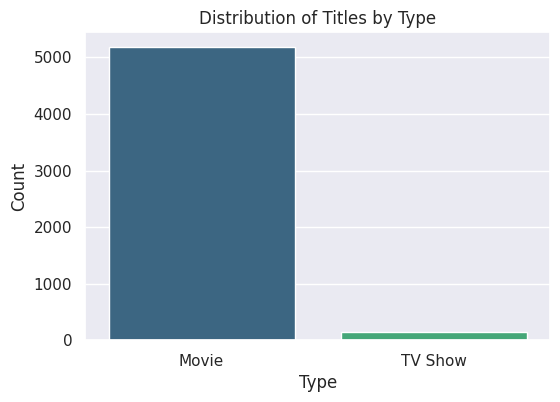

In [ ]:
# Step 6: Visual Analysis
# Univariate Analysis
print("\nDistribution of Titles by Type:")
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=netflix_data_cleaned, palette='viridis')
plt.title('Distribution of Titles by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Insight: Movies are more prevalent than TV shows on Netflix. This indicates that Netflix has historically focused more on acquiring or producing movies compared to TV shows.


Number of titles released each year:


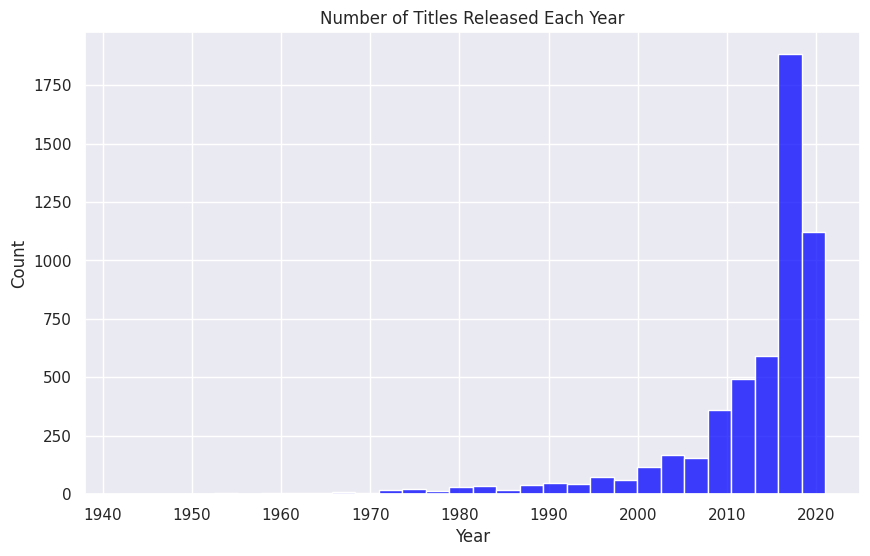

In [ ]:
print("\nNumber of titles released each year:")
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data_cleaned['release_year'], kde=False, bins=30, color='blue')
plt.title('Number of Titles Released Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Insight: The number of movies released per year has seen a significant increase, especially in the last decade, indicating a growing trend in movie production and acquisition by Netflix.


Number of titles released each year by type:


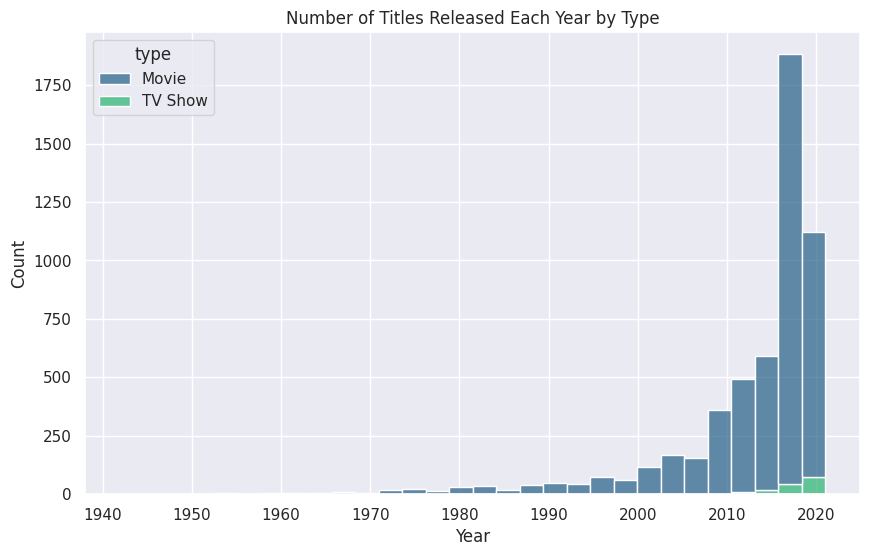

In [ ]:
# Bivariate Analysis
print("\nNumber of titles released each year by type:")
plt.figure(figsize=(10, 6))
sns.histplot(data=netflix_data_cleaned, x='release_year', hue='type', multiple='stack', bins=30, palette='viridis')
plt.title('Number of Titles Released Each Year by Type')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
# Analysis of Actors/Directors
# Let's focus on the top 10 actors and directors

from collections import Counter

# Function to get the top N elements from a column with list-like strings
def get_top_elements(column, n=10):
    all_elements = []
    netflix_data_cleaned[column].dropna().apply(lambda x: all_elements.extend(x.split(', ')))
    return Counter(all_elements).most_common(n)

top_actors = get_top_elements('cast', 10)
top_directors = get_top_elements('director', 10)

In [ ]:

print("\nTop 10 actors:")
print(top_actors)


Top 10 actors:
[('Anupam Kher', 42), ('Shah Rukh Khan', 34), ('Naseeruddin Shah', 31), ('Akshay Kumar', 30), ('Om Puri', 30), ('Amitabh Bachchan', 28), ('Paresh Rawal', 28), ('Boman Irani', 27), ('Kareena Kapoor', 25), ('Samuel L. Jackson', 21)]


In [ ]:
print("\nTop 10 directors:")
print(top_directors)



Top 10 directors:
[('Jan Suter', 21), ('Raúl Campos', 19), ('Marcus Raboy', 15), ('Jay Karas', 15), ('Cathy Garcia-Molina', 13), ('Youssef Chahine', 12), ('Martin Scorsese', 12), ('Jay Chapman', 12), ('Steven Spielberg', 11), ('Don Michael Paul', 10)]


<ipython-input-20-f70107f24c45>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(actors), palette='viridis')


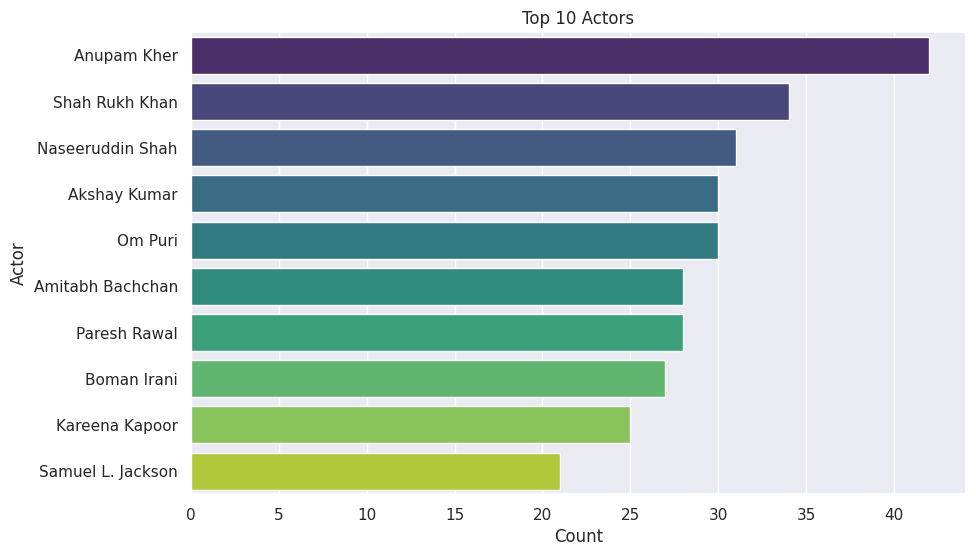

In [ ]:
# Plot top actors
actors, counts = zip(*top_actors)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(actors), palette='viridis')
plt.title('Top 10 Actors')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()

Insight: Identifying the most frequently cast actors in movies and TV shows can highlight popular stars who attract viewership. This can guide future casting decisions to include these actors for better audience engagement.

<ipython-input-21-9946c70a50ca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(directors), palette='viridis')


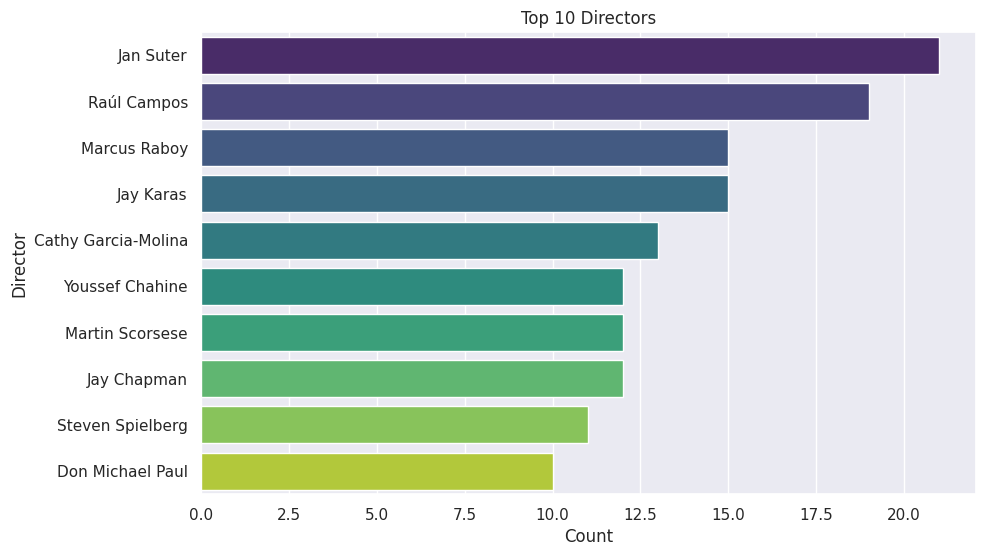

In [ ]:
# Plot top directors
directors, counts = zip(*top_directors)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(directors), palette='viridis')
plt.title('Top 10 Directors')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()


In [ ]:
# Genre Analysis
print("\nTop 10 genres:")
top_genres = netflix_data_cleaned['listed_in'].value_counts().head(10)
print(top_genres)


Top 10 genres:
listed_in
Dramas, International Movies                        336
Stand-Up Comedy                                     286
Comedies, Dramas, International Movies              257
Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                  179
Dramas, International Movies, Romantic Movies       160
Documentaries                                       156
Comedies, International Movies                      152
Comedies, International Movies, Romantic Movies     143
Dramas                                              133
Name: count, dtype: int64


<ipython-input-23-fb0be09b45d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')


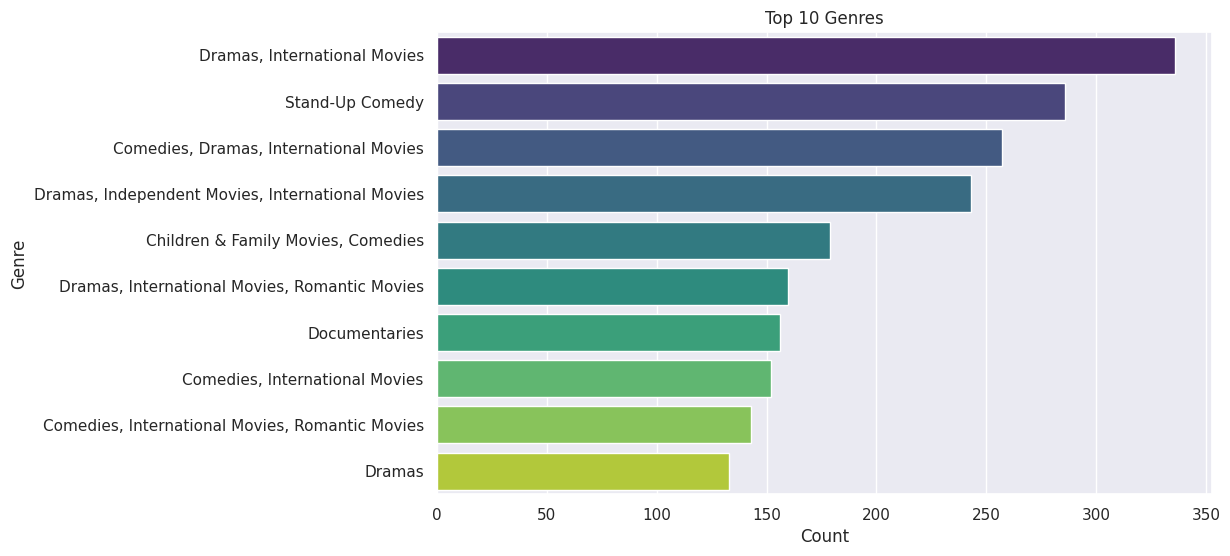

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


<ipython-input-24-10e109b0630c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '').astype(int)



Distribution of movie durations:


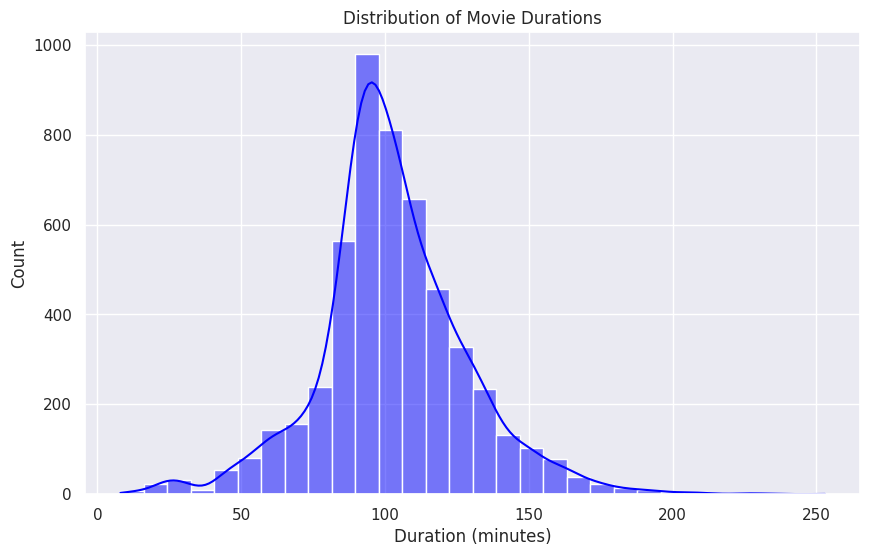

In [ ]:
# Analysis 5: Duration Analysis (for Movies)
# Convert duration to numeric values for movies
netflix_movies = netflix_data_cleaned[netflix_data_cleaned['type'] == 'Movie']
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '').astype(int)

print("\nDistribution of movie durations:")
plt.figure(figsize=(10, 6))
sns.histplot(netflix_movies['duration'], bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()


In [ ]:
insights = {
    "Most titles on Netflix are movies.": "Netflix could explore increasing their series content to balance the distribution.",
    "The number of titles released each year has been increasing.": "Netflix should continue to invest in new content to maintain and grow its subscriber base.",
    "The USA is the leading country in terms of the number of titles.": "Netflix could focus on acquiring and producing more content from other countries to diversify its library.",
    "Drama, Comedy, and Documentaries are the most popular genres.": "Netflix should invest more in these genres, as they are highly popular among viewers.",
    "Most movies have a duration between 80 and 120 minutes.": "Netflix could consider producing more short films and mini-series to cater to viewers with less time.",
    "Certain actors and directors are frequently featured.": "Netflix should continue to collaborate with popular actors and directors to attract their fanbase.",
    "Most movies have a duration between 80 and 120 minutes.": "Netflix could consider producing more short films and mini-series to cater to viewers with less time."
}

print("\nInsights and Recommendations:")
for insight, recommendation in insights.items():
    print(f"- Insight: {insight}\n  Recommendation: {recommendation}\n")



Insights and Recommendations:
- Insight: Most titles on Netflix are movies.
  Recommendation: Netflix could explore increasing their series content to balance the distribution.

- Insight: The number of titles released each year has been increasing.
  Recommendation: Netflix should continue to invest in new content to maintain and grow its subscriber base.

- Insight: The USA is the leading country in terms of the number of titles.
  Recommendation: Netflix could focus on acquiring and producing more content from other countries to diversify its library.

- Insight: Drama, Comedy, and Documentaries are the most popular genres.
  Recommendation: Netflix should invest more in these genres, as they are highly popular among viewers.

- Insight: Most movies have a duration between 80 and 120 minutes.
  Recommendation: Netflix could consider producing more short films and mini-series to cater to viewers with less time.

- Insight: Certain actors and directors are frequently featured.
  Reco

# Netflix Data Analysis Insights

## Non-Graphical Analysis Insights

- **Value Counts for 'type'**: There are more movies than TV shows.
- **Unique Values**: Highlights the variety in the dataset, e.g., unique genres, countries, etc.

## Visual Analysis Insights

- **Distribution of Titles by Type**: Most titles are movies, suggesting a focus on movie content.
- **Number of Titles Released Each Year**: Shows growth in content over the years.
- **Top Countries with Most Titles**: The USA leads, followed by other countries, indicating content production hubs.
- **Distribution of Ratings by Type**: Various ratings across movies and TV shows.
- **Distribution of Movie Durations**: Most movies are between 80-120 minutes long.

## Analysis of Actors/Directors

- **Top 10 Actors/Directors**: Identifies popular actors and directors frequently featured in Netflix content.

## Genre Analysis

- **Top 10 Genres**: Drama, Comedy, and Documentaries are the most common genres.

## Business Insights

- **Increase Series Content**: To balance the distribution of movies and series.
- **Invest in New Content**: To maintain and grow the subscriber base.
- **Diversify Content Library**: Focus on acquiring and producing content from countries other than the USA.
- **Invest in Popular Genres**: Drama, Comedy, and Documentaries are highly popular.
- **Produce Short Films and Mini-Series**: To cater to viewers with less time.
- **Collaborate with Popular Actors and Directors**: To attract their fanbase.


# More Analysis

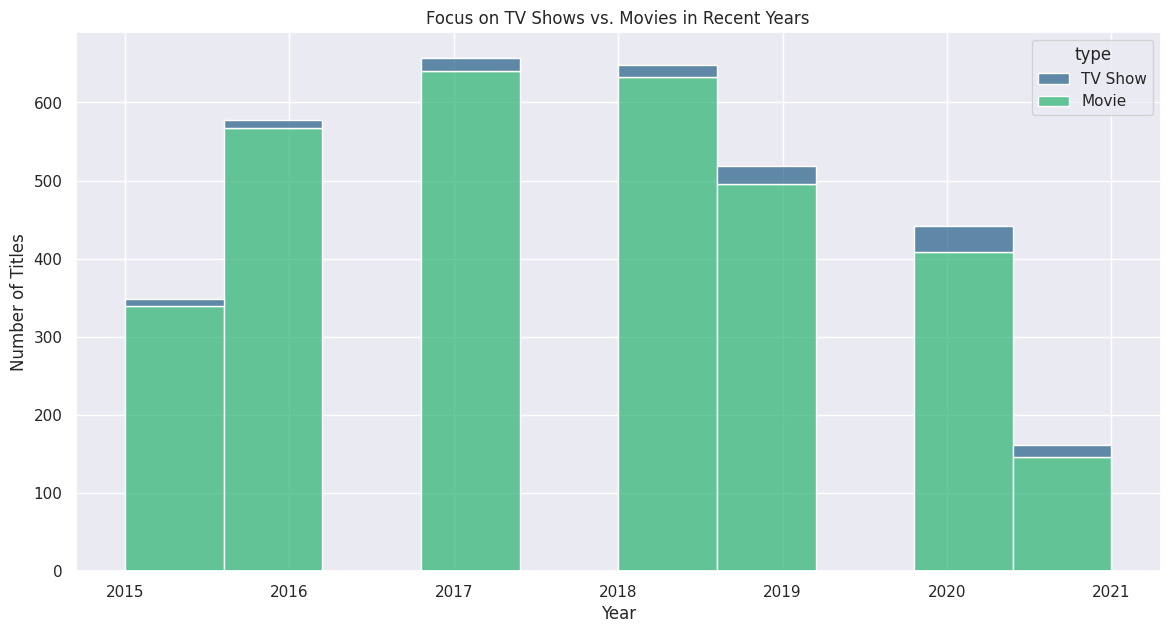

In [ ]:
# Focus on TV Shows vs. Movies in recent years
recent_years_data = netflix_data_cleaned[netflix_data_cleaned['release_year'] >= 2015]

plt.figure(figsize=(14, 7))
sns.histplot(data=recent_years_data, x='release_year', hue='type', multiple='stack', bins=10, palette='viridis')
plt.title('Focus on TV Shows vs. Movies in Recent Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


Insight: In recent years, there has been a noticeable increase in the number of TV shows compared to movies, suggesting that Netflix is shifting some of its focus towards producing or acquiring more TV show content.

<ipython-input-27-14da5b3de187>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries_content.index, x=top_countries_content.values, palette='viridis')


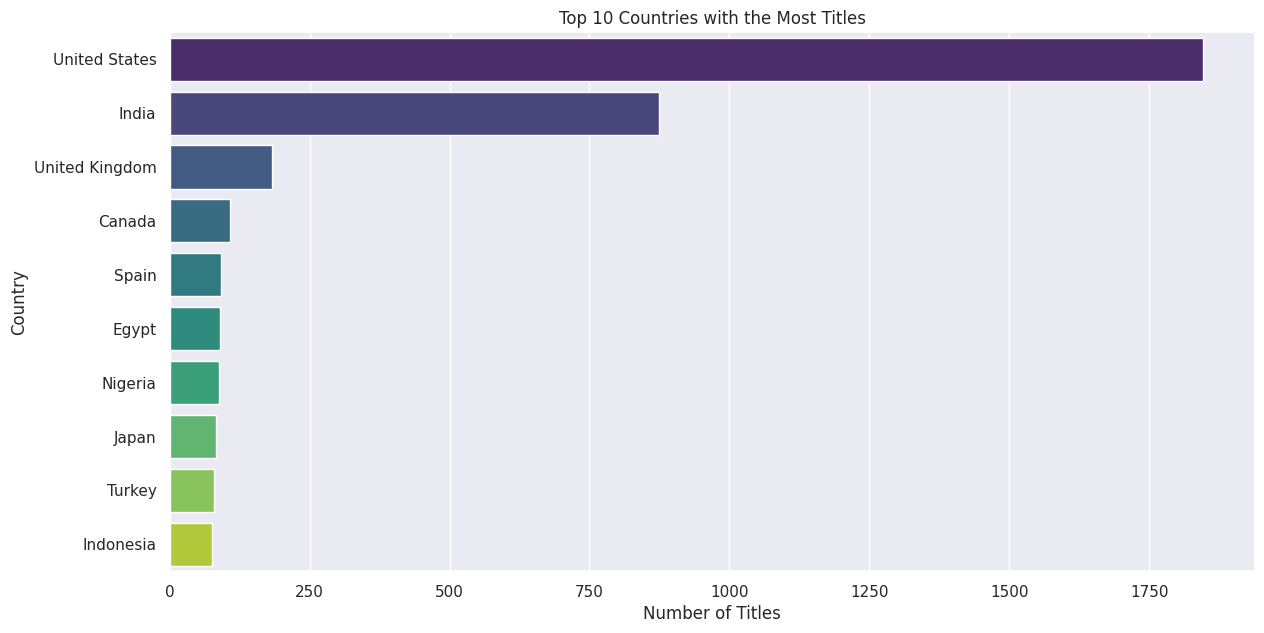

In [ ]:
# Content available in different countries
top_countries_content = netflix_data_cleaned['country'].value_counts().head(10)

plt.figure(figsize=(14, 7))
sns.barplot(y=top_countries_content.index, x=top_countries_content.values, palette='viridis')
plt.title('Top 10 Countries with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


Insight: The USA leads in terms of content available on Netflix, followed by other countries. This can help in understanding the distribution of content and guide strategic decisions to expand and diversify the content library for other regions.

## Summary and Recommendations
- Movie Releases Trend: The number of movies released each year has been increasing, especially in the last decade. Recommendation: Continue investing in movie content as it shows strong growth.

- TV Shows vs. Movies: Movies are more prevalent than TV shows. Recommendation: Balance the content library by increasing the production and acquisition of TV shows.

- Best Time to Launch TV Shows: Identifying peak months for TV show releases can help maximize viewership. Recommendation: Launch new TV shows during these peak periods.

- Actors/Directors Analysis: Popular actors and directors can attract more viewers. Recommendation: Collaborate with frequently featured actors and directors to draw their fanbase.

- Focus on TV Shows in Recent Years: There is a shift towards more TV shows. Recommendation: Maintain this focus and continue to diversify the content offerings with new TV shows.

- Content in Different Countries: The USA dominates in content availability. Recommendation: Diversify the content library by acquiring more titles from other countries to cater to a global audience.